In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplstereonet               #stereonet package 
import ternary as te              #python-ternary diagram package

## 1.0 Data

In [2]:
#Import a csv file containing the clast fabric measurements (a-axis azimuths and dip angle; here referred to as 'trend' and 'plunge', respectively)
df = pd.read_csv(r'C:\Filename.csv') #Just specify the path and file name before running the code on new data
df.head()  #Here is just an example

,trend,plunge
0,255,12
1,252,5
2,275,2
3,90,6
4,100,10


In [3]:
#Create an array from the 'trend' column of the dataframe and display horizontally (one line)
Trend=df.loc[:,'trend']
Trend=np.hstack(Trend)
print(Trend)

[255 252 275  90 100  85 270 280  88  78  95  98 100  90  62  72  80 280
 290 110 140  25 190 340 335  55 145  87  96  98 268  92 112 105  75 270
 268  92 165   5 340 108  90  65  68  66  58  50  82 100 102 252]


In [4]:
#Do the same for the plunge data

Plunge=df.loc[:,'plunge']
Plunge=np.hstack(Plunge)
print(Plunge)

[12  5  2  6 10  2 15  5  2  4  7 10  2 15  4  8 20 14  5 12 17 25 25 22
  5  3  8  5  2 10  5  3 10  2  6 12  2  6  8 10 12  6  4 10  6  2  2  8
 12  1  8  5]


## 2.0 Data projections

In [5]:
#First, let's prepare the data to build the rose diagram

#Calculate the number of directions (bins) every 10° using numpy.histogram.

bin_edges = np.arange(-5, 366, 10)                              #numpy.arange(start, stop, step)
trends_in_bins, bin_edges = np.histogram(Trend, bin_edges)
print(trends_in_bins)

[0 1 0 1 0 1 3 4 4 8 8 4 0 0 1 1 0 1 0 1 0 0 0 0 0 2 1 4 3 1 0 0 0 0 3 0 0]


In [6]:
print(bin_edges)

[ -5   5  15  25  35  45  55  65  75  85  95 105 115 125 135 145 155 165
 175 185 195 205 215 225 235 245 255 265 275 285 295 305 315 325 335 345
 355 365]


In [7]:
Trends=trends_in_bins[0:-1]
print(Trends)                     #37 bins

[0 1 0 1 0 1 3 4 4 8 8 4 0 0 1 1 0 1 0 1 0 0 0 0 0 2 1 4 3 1 0 0 0 0 3 0]


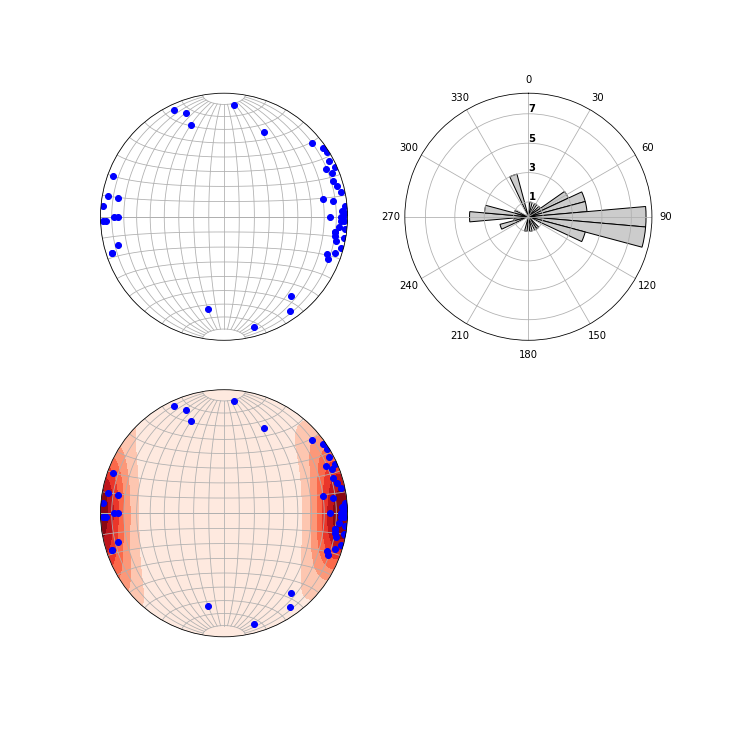

In [8]:
#Create the rose diagram and the stereonets.

fig = plt.figure(figsize=(10, 10))         #creates an empty figure with no Axes

ax1 = fig.add_subplot(221, projection='stereonet')
ax1.line(Plunge, Trend, 'o', color='blue')


ax2 = fig.add_subplot(222, projection='polar')

ax2.bar(np.deg2rad(np.arange(0, 360, 10)), Trends, 
       width=np.deg2rad(10), bottom=0.0, color='.8', edgecolor='k')
ax2.set_theta_zero_location('N')
ax2.set_theta_direction(-1)
ax2.set_thetagrids(np.arange(0, 360, 30), labels=np.arange(0, 360, 30))
ax2.set_rgrids(np.arange(1, Trends.max() + 1, 2), angle=0, weight= 'black')

ax3 = fig.add_subplot(223, projection='stereonet')
ax3.line(Plunge, Trend, 'o', color='blue')
ax3.density_contourf(Plunge, Trend, measurement='lines', cmap='Reds')

# Plot these things on the two stereonets
for ax in [ax1, ax3]:
    ax.grid()
    ax.set_azimuth_ticks([])
    

plt.show()

## 3.0 Orientation tensors

In [9]:
#Getting eigenvalues and eigenvectors is straighforward using mplstereonet

plu, azi, vals = mplstereonet.eigenvectors(Plunge, Trend, measurement='lines') #This returns 1-D arrays for plunge, azimuth, and normalized eigenvalues
print(plu,azi,vals)

[ 3.25242441  2.65176625 85.80175362] [ 89.48828459 359.33748596 230.21676674] [0.78869303 0.19391345 0.02710226]


In [10]:
#Extract the normalized eigenvalues
S1=vals[0]
S2=vals[1]
S3=vals[2]

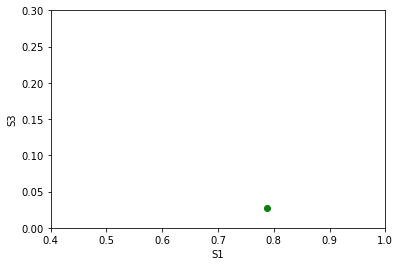

In [11]:
#Make a biplot of S3 and S1

plt.scatter(S1,S3, c='green')
plt.xlabel('S1')
plt.ylabel('S3')
plt.xlim((0.4, 1.0))
plt.ylim((0.0, 0.3))
plt.show()

In [12]:
E=1-(S2/S1).round(4)     #Elongation index
print(E)

0.7541


In [13]:
I=(S3/S1).round(4)        #Isotropy index
print(I)

0.0344


In [14]:
R=(1-(E+I)).round(4)    #A residual value to allow plotting the indices correctly on a ternary diagram
print(R)

0.2115


In [15]:
df=pd.DataFrame(columns=['E','I', 'R'])
df

,E,I,R


In [16]:
df.loc[0]=[E,I,R]
df

,E,I,R
0,0.7541,0.0344,0.2115


In [17]:
df["E"]=df['E'].astype('float')      #To specify the Dtype is 'float'
df["I"]=df['I'].astype('float')
df["R"]=df['R'].astype('float')
df.dtypes

E    float64
I    float64
R    float64
dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   E       1 non-null      float64
 1   I       1 non-null      float64
 2   R       1 non-null      float64
dtypes: float64(3)
memory usage: 32.0 bytes


In [19]:
df

,E,I,R
0,0.7541,0.0344,0.2115


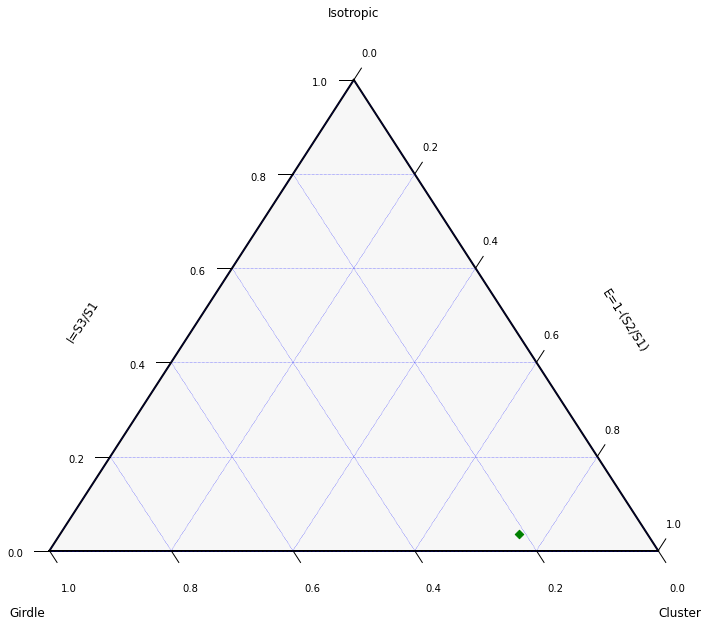

In [20]:
#Let's plot the results on a ternary diagram of fabric shape!

scale = 1.0
figure, fabric = te.figure(scale=scale)
figure.set_size_inches(12,10)

#PLot the data
fabric.scatter(df[['E','I','R']].values, marker='D', color='green', label="Green Diamonds")
    
# Draw Boundary and Gridlines
fabric.boundary(linewidth=2.0)
fabric.gridlines(color="blue", multiple=0.2)
    
# Set Axis labels
fontsize = 12
offset = 0.2
fabric.left_axis_label("I=S3/S1", fontsize=fontsize, offset=0.2)
fabric.right_axis_label("E=1-(S2/S1)", fontsize=fontsize, offset=0.2)
fabric.top_corner_label("Isotropic", fontsize=fontsize, offset=0.25)
fabric.right_corner_label("Cluster", fontsize=fontsize, offset=-0.05)
fabric.left_corner_label("Girdle", fontsize=fontsize, offset=-0.05)

#This is to configure the style of the axes and ticks and specify their orientation/sense
fabric.ticks(axis='lbr', multiple=0.2, linewidth=1, offset=0.025, tick_formats="%.1f", clockwise=True)
fabric.get_axes().axis('off')
fabric.clear_matplotlib_ticks()

fabric.show()

In [21]:
#Extract just V1
V1_azi=azi[0]
V1_azi=V1_azi.round(1)
V1_dip=plu[0]
V1_dip=V1_dip.round(1)
print("V1 is", V1_dip, "\u2192", V1_azi)

V1 is 3.3 → 89.5


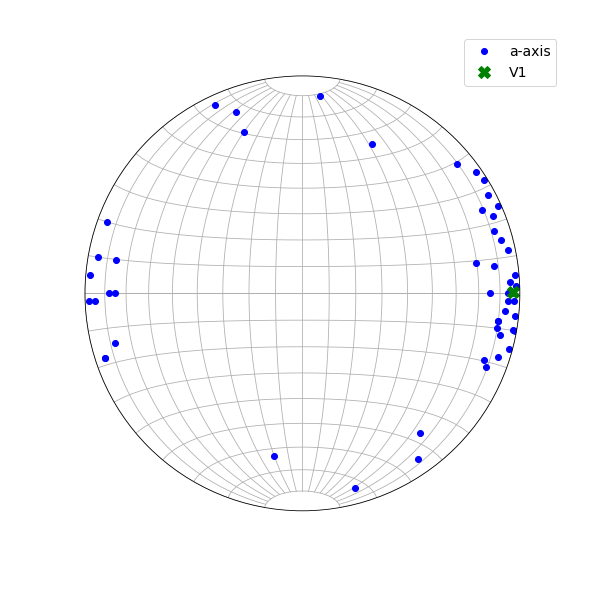

In [25]:
#Now V1 can be added to the data points on the stereonet

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.line(Plunge, Trend, 'o', color='blue', label='a-axis')
plunge=V1_dip
bearing=V1_azi
ax.line(plunge, bearing, 'X', color='green', markersize=12, label="V1")

# This will avoid repetition of labels in the legend:
from collections import OrderedDict

handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

#This is to display the legend in the upper right corner without overlapping the stereonet
ax.legend(by_label.values(), by_label.keys(), loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=14)

ax.grid()
ax.set_azimuth_ticks([])

plt.show()